In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
data = pd.read_csv("Telco-Customer-Churn.csv")

In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
data.shape

(7043, 21)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
for col in data.columns:
    print("column:{} -Uniquevalues: {}".format(col,data[col].unique()))

column:customerID -Uniquevalues: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
column:gender -Uniquevalues: ['Female' 'Male']
column:SeniorCitizen -Uniquevalues: [0 1]
column:Partner -Uniquevalues: ['Yes' 'No']
column:Dependents -Uniquevalues: ['No' 'Yes']
column:tenure -Uniquevalues: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
column:PhoneService -Uniquevalues: ['No' 'Yes']
column:MultipleLines -Uniquevalues: ['No phone service' 'No' 'Yes']
column:InternetService -Uniquevalues: ['DSL' 'Fiber optic' 'No']
column:OnlineSecurity -Uniquevalues: ['No' 'Yes' 'No internet service']
column:OnlineBackup -Uniquevalues: ['Yes' 'No' 'No internet service']
column:DeviceProtection -Uniquevalues: ['No' 'Yes' 'No internet service']
column:TechSupport -Uniquevalues: ['No' 'Yes' 'No inte

In [10]:
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [11]:
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')

In [12]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [14]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


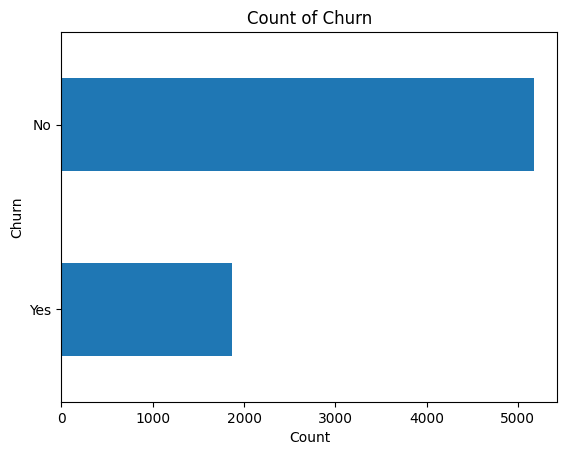

In [15]:
data['Churn'].value_counts().plot(kind='barh')
plt.xlabel("Count")
plt.ylabel("Churn")
plt.title("Count of Churn")
plt.gca().invert_yaxis()
plt.show()

In [16]:
data['Churn'].value_counts()/len(data)

Churn
No     0.73463
Yes    0.26537
Name: count, dtype: float64

In [17]:
data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [18]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [19]:
telco_data = data.copy()

In [20]:
telco_data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [21]:
telco_data.loc[telco_data['TotalCharges'].isna()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [22]:
telco_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [23]:
telco_data.isna().sum()/len(telco_data)

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.001562
Churn               0.000000
dtype: float64

In [24]:
telco_data.dropna(how='any',inplace=True)

In [25]:
print(telco_data['tenure'].max())

72


In [26]:
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['1 - 12', '13 - 24', '25 - 36', '37 - 48', '49 - 60', '61 - 72']

telco_data['tenure_group'] = pd.cut(telco_data['tenure'], bins=bins, labels=labels,right = False)

In [27]:
telco_data['tenure_group'].value_counts()

tenure_group
1 - 12     2058
61 - 72    1121
13 - 24    1047
25 - 36     876
49 - 60     820
37 - 48     748
Name: count, dtype: int64

In [28]:
telco_data['tenure_group'].value_counts()/len(telco_data)

tenure_group
1 - 12     0.292662
61 - 72    0.159414
13 - 24    0.148891
25 - 36    0.124573
49 - 60    0.116610
37 - 48    0.106371
Name: count, dtype: float64

In [32]:
telco_data.drop(['customerID','tenure'],axis=1,inplace=True)

In [33]:
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


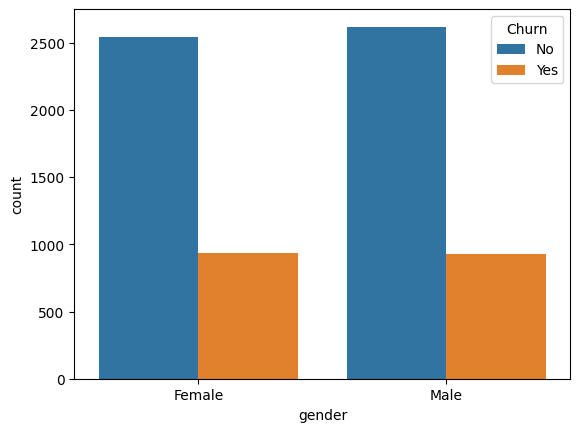

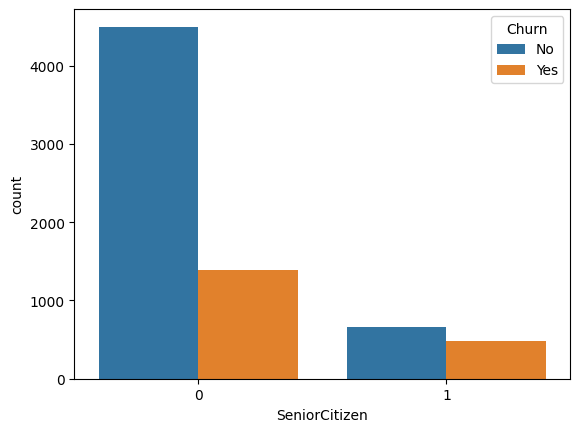

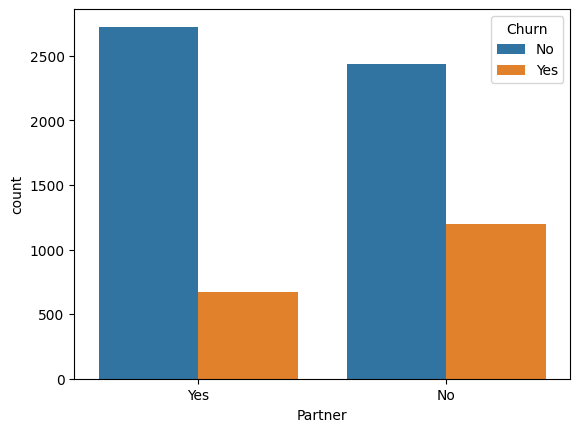

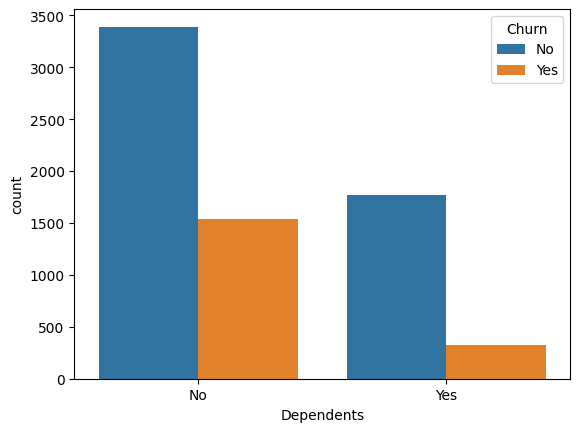

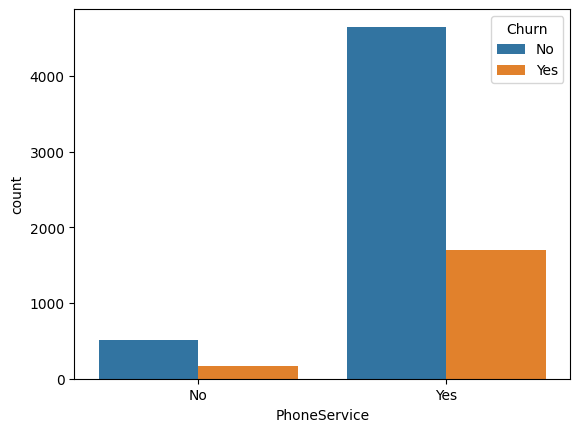

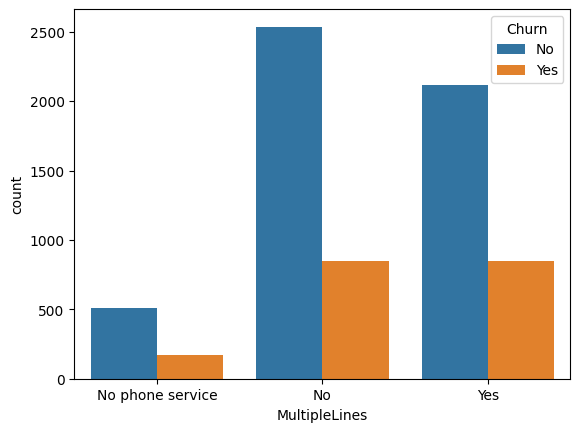

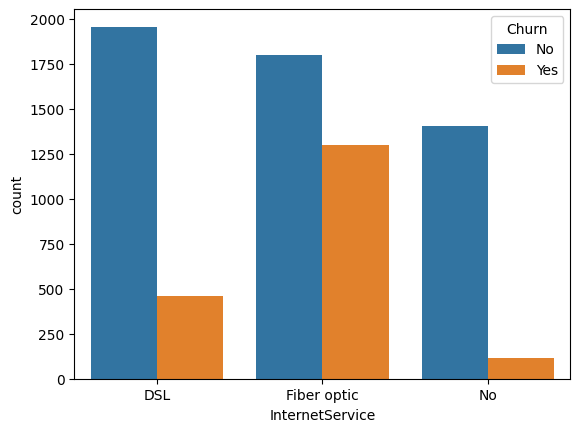

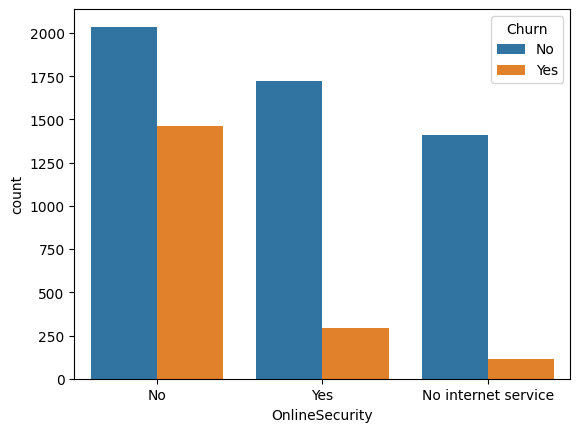

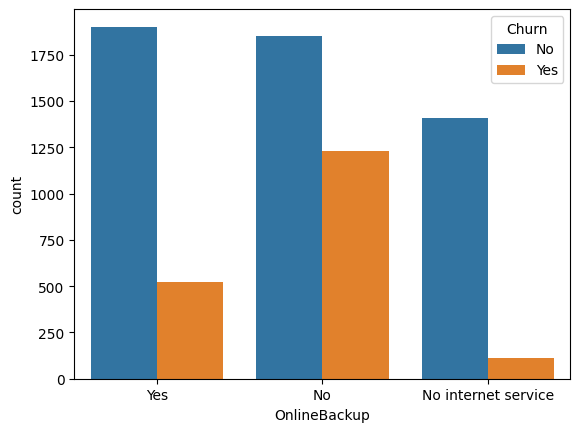

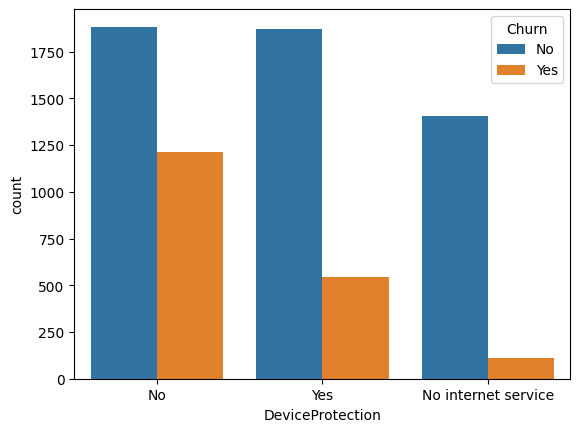

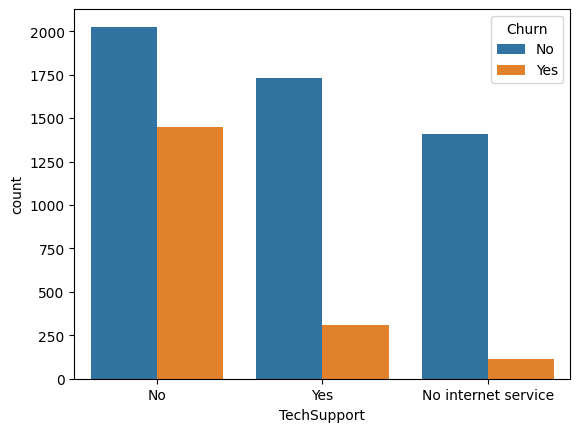

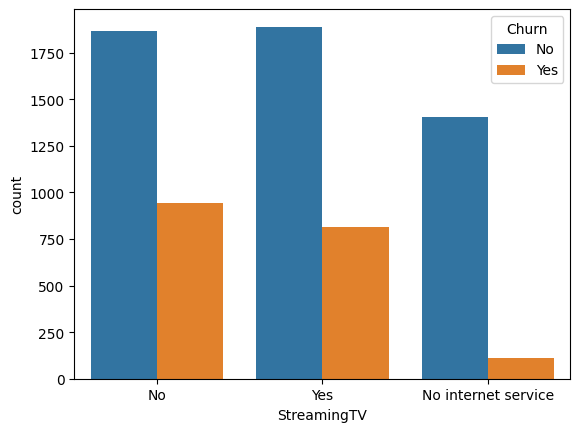

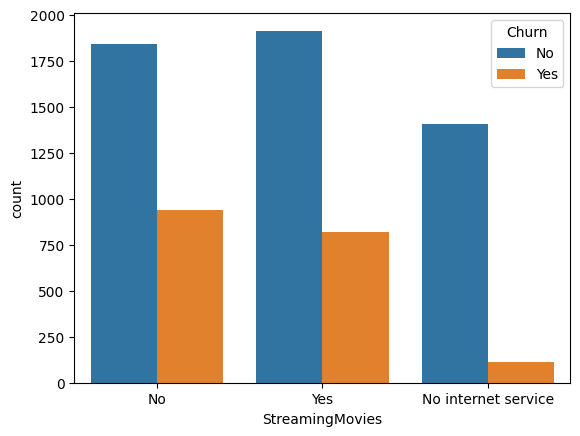

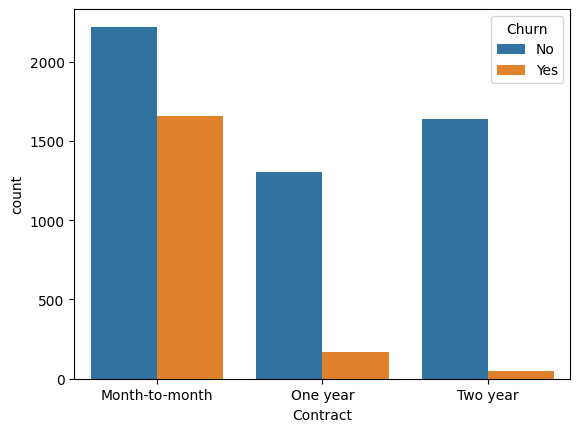

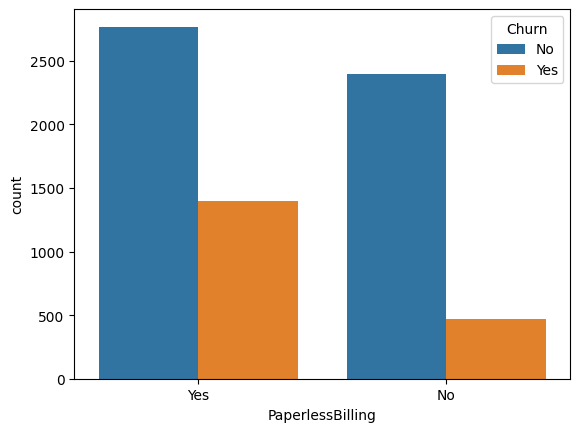

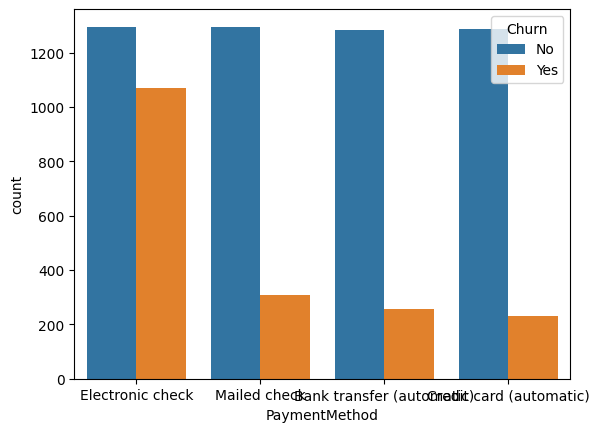

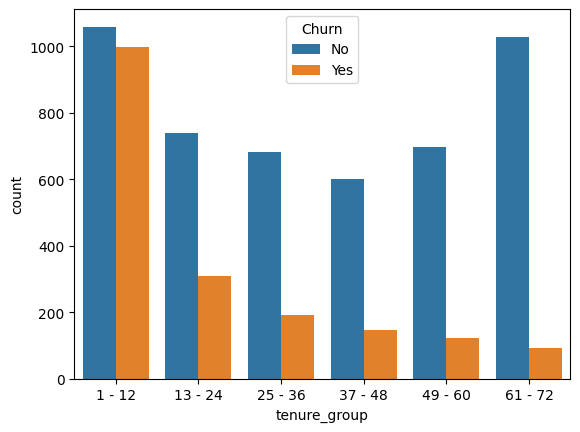

In [34]:
for i, predictor in enumerate(telco_data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=telco_data, x=predictor, hue='Churn')

In [35]:
telco_data['Churn'] = np.where(telco_data.Churn == 'Yes',1,0)

In [36]:
telco_data.sample(3)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
2416,Male,0,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),100.50,2673.45,0,25 - 36
2857,Female,0,Yes,Yes,Yes,No,DSL,No,Yes,No,Yes,No,Yes,Two year,No,Bank transfer (automatic),63.80,3007.25,0,37 - 48
3927,Male,0,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),20.55,51.15,1,1 - 12


In [37]:
telco_data.dtypes

gender                object
SeniorCitizen          int64
Partner               object
Dependents            object
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                  int64
tenure_group        category
dtype: object

In [39]:
categ = []

# Loop through each column in the dataset
for column in telco_data.columns:
    # Check if the column is of type 'object' or 'category'
    if telco_data[column].dtype == 'object':
        categ.append(column)

# Print out the categorical columns found
print("Categorical columns:", categ)

Categorical columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [40]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le


LabelEncoder()

In [41]:
categ=['gender','SeniorCitizen', 'tenure_group' ,'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod',  'Churn',]

telco_data[categ] = telco_data[categ].apply(le.fit_transform)

In [43]:
telco_data.sample(3)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
6313,1,0,0,0,1,0,1,0,0,2,0,2,2,0,1,2,95.85,197.7,1,0
4228,1,0,1,1,1,0,1,0,0,0,0,0,0,0,1,2,68.50,68.5,1,0
6968,0,1,0,0,1,2,1,0,0,0,0,0,0,0,1,0,74.40,1692.6,1,1


<Axes: >

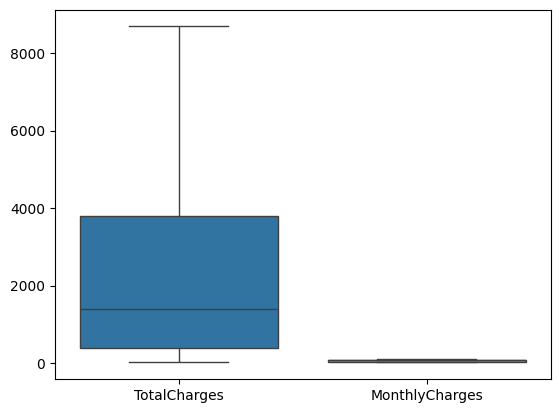

In [44]:
sns.boxplot(data=telco_data[['TotalCharges','MonthlyCharges']])

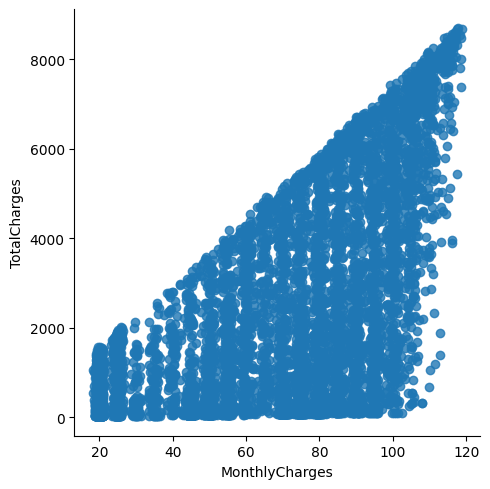

In [45]:
sns.lmplot(data=telco_data, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

C:\Users\sahoo\AppData\Local\Temp\ipykernel_3076\1314427785.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(telco_data.MonthlyCharges[(telco_data["Churn"] == 0) ],
C:\Users\sahoo\AppData\Local\Temp\ipykernel_3076\1314427785.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(telco_data.MonthlyCharges[(telco_data["Churn"] == 1) ],


Text(0.5, 1.0, 'Monthly charges by churn')

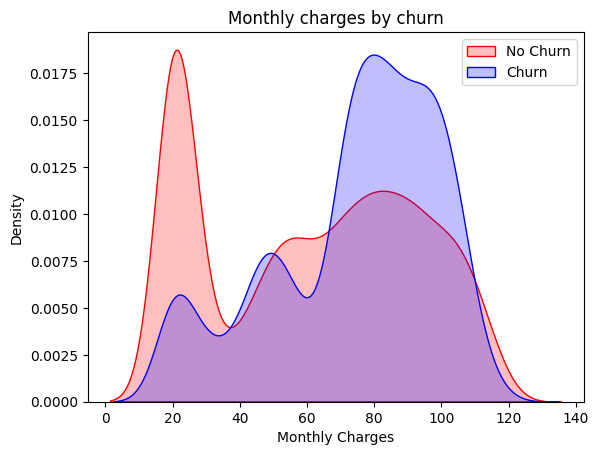

In [49]:
Mth = sns.kdeplot(telco_data.MonthlyCharges[(telco_data["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(telco_data.MonthlyCharges[(telco_data["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

C:\Users\sahoo\AppData\Local\Temp\ipykernel_3076\2039743036.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(telco_data.TotalCharges[(telco_data["Churn"] == 0) ],
C:\Users\sahoo\AppData\Local\Temp\ipykernel_3076\2039743036.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(telco_data.TotalCharges[(telco_data["Churn"] == 1) ],


Text(0.5, 1.0, 'Total charges by churn')

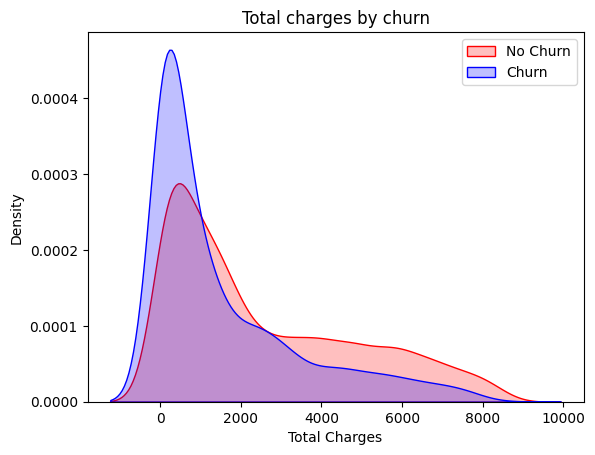

In [50]:
Tot = sns.kdeplot(telco_data.TotalCharges[(telco_data["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(telco_data.TotalCharges[(telco_data["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

<Axes: >

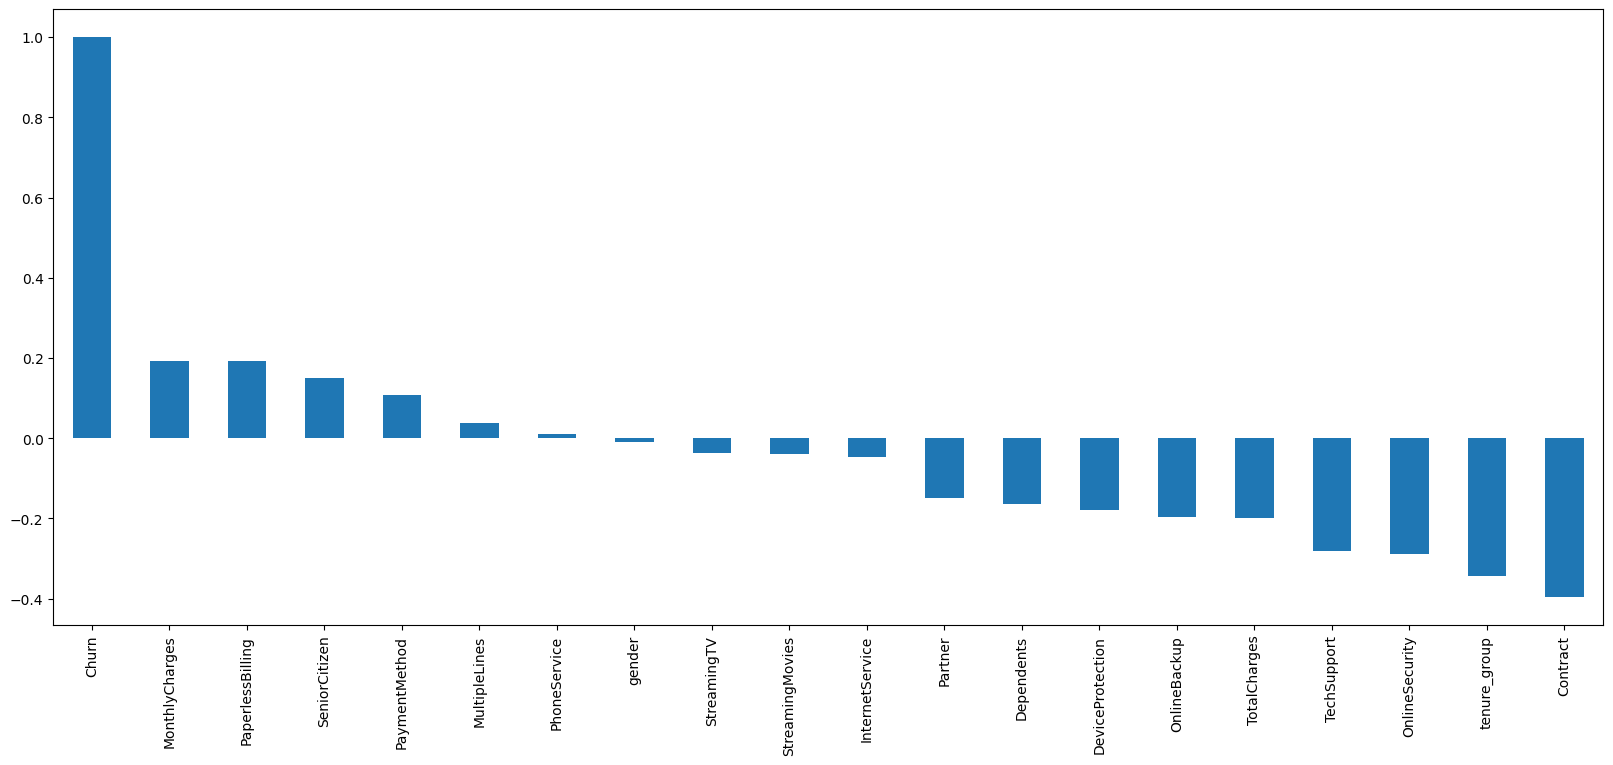

In [51]:
plt.figure(figsize=(20,8))
telco_data.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

<Axes: >

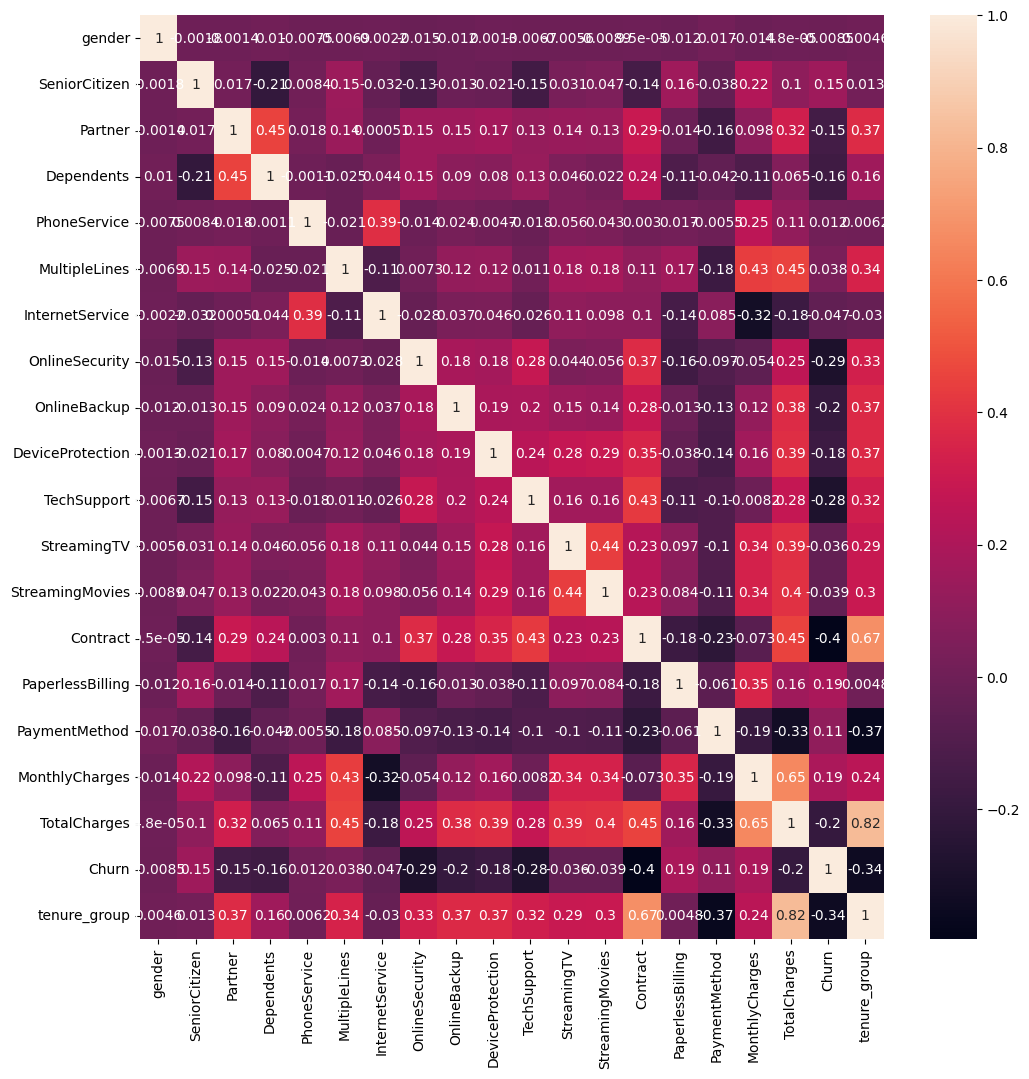

In [52]:
plt.figure(figsize=(12,12))
sns.heatmap(telco_data.corr(), annot=True)

In [53]:
x = telco_data.drop('Churn',axis=1)
y = telco_data['Churn']

In [54]:
telco_data['Churn'].value_counts()/len(telco_data)

Churn
0    0.734215
1    0.265785
Name: count, dtype: float64

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [57]:
print('Traing data shape')

print(x_train.shape)
print(y_train.shape)




print('Testing Data shape')

print(x_test.shape)
print(y_test.shape)

Traing data shape
(5625, 19)
(5625,)
Testing Data shape
(1407, 19)
(1407,)


In [59]:
from sklearn.tree import DecisionTreeClassifier
model_dtc=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)
model_dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [60]:
model_dtc.score(x_test,y_test)

0.7896233120113717

In [61]:
y_pred = model_dtc.predict(x_test)
y_pred[:10]

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0])

In [62]:
print(y_test[:10])

5561    0
5814    0
2645    0
3983    1
6438    1
4561    0
6271    0
4081    1
3937    0
1357    0
Name: Churn, dtype: int64


In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1038
           1       0.63      0.48      0.54       369

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407



In [66]:
!pip install imbalanced-learn


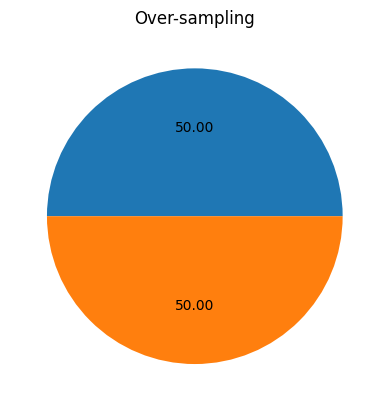

In [69]:
from imblearn.over_sampling import SMOTE

smote=SMOTE()

x_ovs,y_ovs=smote.fit_resample(x,y)



fig, oversp = plt.subplots()
oversp.pie( y_ovs.value_counts(), autopct='%.2f')
oversp.set_title("Over-sampling")
plt.show()


In [70]:
xr_train,xr_test,yr_train,yr_test = train_test_split(x_ovs,y_ovs,test_size=0.20,random_state=0)

In [78]:
from sklearn.linear_model import LogisticRegression


In [79]:
model_lr=LogisticRegression(max_iter=1000)

In [80]:
model_lr.fit(xr_train,yr_train)

c:\Users\sahoo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [81]:
y_pred = model_lr.predict(xr_test)
y_pred[:10]

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [82]:
model_lr.score(xr_test,yr_test)

0.8276863504356244

In [83]:
from sklearn.metrics import accuracy_score, classification_report


report = classification_report(y_pred, yr_test, labels=[0, 1])

print(report)

              precision    recall  f1-score   support

           0       0.78      0.85      0.82       924
           1       0.87      0.81      0.84      1142

    accuracy                           0.83      2066
   macro avg       0.83      0.83      0.83      2066
weighted avg       0.83      0.83      0.83      2066



In [84]:
from sklearn.metrics import confusion_matrix
confusion_matrix(yr_test,y_pred)

array([[787, 219],
       [137, 923]])

In [85]:
from sklearn.tree import DecisionTreeClassifier

model_dtc=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [86]:
model_dtc.fit(xr_train,yr_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [88]:
y_pred=model_dtc.predict(xr_test)
y_pred[:10]

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 1])

In [89]:
yr_test[:10]

6917    0
7023    1
2730    0
2030    0
3959    0
176     1
2774    1
4757    0
4503    0
3724    1
Name: Churn, dtype: int64

In [91]:
model_dtc.score(xr_test,yr_test)

0.81945788964182

In [92]:
print(classification_report(yr_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81      1006
           1       0.80      0.87      0.83      1060

    accuracy                           0.82      2066
   macro avg       0.82      0.82      0.82      2066
weighted avg       0.82      0.82      0.82      2066



In [93]:
confusion_matrix(yr_test,y_pred)

array([[775, 231],
       [142, 918]])

In [94]:
from sklearn.ensemble import RandomForestClassifier

model_rfc=RandomForestClassifier(n_estimators=100, random_state = 100,max_depth=6, min_samples_leaf=8,class_weight='balanced')

In [95]:
model_rfc.fit(xr_train,yr_train)

RandomForestClassifier(class_weight='balanced', max_depth=6, min_samples_leaf=8,
                       random_state=100)

In [96]:
y_pred=model_rfc.predict(xr_test)
y_pred[:10]

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 1])

In [97]:
yr_test[:10]

6917    0
7023    1
2730    0
2030    0
3959    0
176     1
2774    1
4757    0
4503    0
3724    1
Name: Churn, dtype: int64

In [99]:
model_rfc.score(xr_test,yr_test)

0.8334946757018393

In [100]:
report_rfc=classification_report(y_pred,yr_test)
print(report_rfc)

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       926
           1       0.88      0.81      0.84      1140

    accuracy                           0.83      2066
   macro avg       0.83      0.84      0.83      2066
weighted avg       0.84      0.83      0.83      2066



In [101]:
confusion_matrix(yr_test,y_pred)

array([[794, 212],
       [132, 928]])

In [102]:
from sklearn.ensemble import  AdaBoostClassifier

In [103]:
model_abc=AdaBoostClassifier(n_estimators=100)

In [104]:
model_abc.fit(xr_train,yr_train)

c:\Users\sahoo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=100)

In [105]:
y_pred=model_abc.predict(xr_test)

In [106]:
print(classification_report(y_pred,yr_test))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       931
           1       0.89      0.83      0.86      1135

    accuracy                           0.85      2066
   macro avg       0.85      0.85      0.85      2066
weighted avg       0.85      0.85      0.85      2066



In [107]:
confusion_matrix(yr_test,y_pred)

array([[813, 193],
       [118, 942]])

In [108]:
from sklearn.ensemble import GradientBoostingClassifier
model_gbc=GradientBoostingClassifier()
model_gbc

GradientBoostingClassifier()

In [109]:
model_gbc.fit(xr_train,yr_train)

GradientBoostingClassifier()

In [111]:
y_pred_gbc=model_gbc.predict(xr_test)
y_pred_gbc[:10]

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 1])

In [112]:
confusion_matrix(yr_test,y_pred)

array([[813, 193],
       [118, 942]])

In [114]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the best hyperparameters obtained from GridSearchCV
best_params = {
   'n_estimators': 100, 'min_samples_split':5 , 'max_depth': 7, 'learning_rate': 0.1
    
    
    
}

# Create Gradient Boosting Classifier with the best hyperparameters
final_gb_classifier = GradientBoostingClassifier(**best_params)

# Train the final model on the entire training data
final_gb_classifier.fit(xr_train, yr_train)


GradientBoostingClassifier(max_depth=7, min_samples_split=5)

In [116]:
import pickle

In [117]:
with open('final_gb_classifier.pkl', 'wb') as file:
    pickle.dump(final_gb_classifier, file)

In [120]:
xr_train.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'tenure_group'],
      dtype='object')

In [123]:
yr_train

1065    1
6747    0
5480    0
1425    0
9234    1
       ..
9225    1
4859    0
3264    0
9845    1
2732    0
Name: Churn, Length: 8260, dtype: int64

In [124]:
with open('final_gb_classifier.pkl', 'rb') as file:
    loaded_model = pickle.load(file)